**Test2Achieve - Alberta.ipynb**

**Team: * Bharat Sharma * Adithya Vinod * Shanmukha Sai Penumatsa**

**Course: DAAN 570 Deep Learning (Spring I, 2023)**

**Problem Statement:**

We have tried to solve this problem by breaking it down into two independent problem statements, namely: 

Automated Answer Generation: 
We will be using pretrained models like Bert, Roberta, Albert and Electra for answer generation tasks, where given a question or prompt, the model generates an answer. These models are trained on large amounts of text data and can learn to generate coherent and accurate responses. 

Automated Grading: 
The answer and scores are first passed through the LSTM which are then passed through the multiple neural layers to train the model. The trained model will return a score for each answer based on historic grading.

In this python notebook we will be using ALBERTA - a pretrained language model to solve the answer generation problem statement.


In [ ]:
import json
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import time


**Data Collection:**

We have used SQUAD 2.0 dataset for building the neural network for answer generation. It consists of a context along with a set of questions and their respective answers.

We have used python function !wget to save the JSON data from the link https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json

In [ ]:
 %%capture
!mkdir squad
!wget https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json -O squad/train-v2.0.json
!wget https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json -O squad/dev-v2.0.json

**Required Package:** 

Transformers are not an inbuild packages in Colab and it needs to be installed seperately using pip install.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.6 MB/s eta 0:00:00


In [ ]:
import os

os.getcwd() 

'/content'

In [ ]:

os.listdir() 

['.config', 'squad', 'sample_data']

In [ ]:
with open('squad/train-v2.0.json', 'rb') as f:
    squad_dict = json.load(f)

texts = []
queries = []
answers = []


for group in squad_dict['data']:
    for passage in group['paragraphs']:
        context = passage['context']
        for qa in passage['qas']:
            question = qa['question']
            for answer in qa['answers']:
                texts.append(context)
                queries.append(question)
                answers.append(answer)

train_texts, train_queries, train_answers = texts, queries, answers

In [ ]:
train_texts_print = train_texts[:10]
print("############# Train texts ####################")
print(train_texts_print)
train_queries_print = train_queries[:10]
print("############# train_queries ####################")
print(train_queries_print)
train_answers_print = train_answers[:10]
print("############# train_answers ####################")
train_answers_print

############# Train texts ####################
['Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".', 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child

[{'text': 'in the late 1990s', 'answer_start': 269},
 {'text': 'singing and dancing', 'answer_start': 207},
 {'text': '2003', 'answer_start': 526},
 {'text': 'Houston, Texas', 'answer_start': 166},
 {'text': 'late 1990s', 'answer_start': 276},
 {'text': "Destiny's Child", 'answer_start': 320},
 {'text': 'Dangerously in Love', 'answer_start': 505},
 {'text': 'Mathew Knowles', 'answer_start': 360},
 {'text': 'late 1990s', 'answer_start': 276},
 {'text': 'lead singer', 'answer_start': 290}]

In [ ]:
path = Path('squad/dev-v2.0.json')

with open(path, 'rb') as f:
    squad_dict = json.load(f)

texts = []
queries = []
answers = []

for group in squad_dict['data']:
    for passage in group['paragraphs']:
        context = passage['context']
        for qa in passage['qas']:
            question = qa['question']
            for answer in qa['answers']:
                texts.append(context)
                queries.append(question)
                answers.append(answer)

val_texts, val_queries, val_answers = texts, queries, answers

In [ ]:
val_texts_print = val_texts[:10]
print("############# Train texts ####################")
print(val_texts_print)
val_queries_print = val_queries[:10]
print("############# train_queries ####################")
print(val_queries_print)
val_answers_print = val_answers[:10]
print("############# train_answers ####################")
val_answers_print

############# Train texts ####################
['The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.', 'The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norma

[{'text': 'France', 'answer_start': 159},
 {'text': 'France', 'answer_start': 159},
 {'text': 'France', 'answer_start': 159},
 {'text': 'France', 'answer_start': 159},
 {'text': '10th and 11th centuries', 'answer_start': 94},
 {'text': 'in the 10th and 11th centuries', 'answer_start': 87},
 {'text': '10th and 11th centuries', 'answer_start': 94},
 {'text': '10th and 11th centuries', 'answer_start': 94},
 {'text': 'Denmark, Iceland and Norway', 'answer_start': 256},
 {'text': 'Denmark, Iceland and Norway', 'answer_start': 256}]

In [ ]:
print(len(train_texts))
print(len(train_queries))
print(len(train_answers))

86821
86821
86821


In [ ]:
print("Passage: ",train_texts[0])  
print("Query: ",train_queries[0])
print("Answer: ",train_answers[0])

Passage:  Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of Beyoncé's debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".
Query:  When did Beyonce start becoming popular?
Answer:  {'text': 'in the late 1990s', 'answer_start': 269}


In [ ]:
train_texts = train_texts[:40000]
train_queries = train_queries[:40000]
train_answers = train_answers[:40000]

val_texts = val_texts[:40000]
val_queries = val_queries[:40000]
val_answers = val_answers[:40000]


# Initial model - 2
#train_texts = train_texts[:60000]
#train_queries = train_queries[:60000]
#train_answers = train_answers[:60000]

#val_texts = val_texts[:60000]
#val_queries = val_queries[:60000]
#val_answers = val_answers[:60000]

print(len(train_texts))
print(len(train_queries))
print(len(train_answers))


print(len(val_texts))
print(len(val_queries))
print(len(val_answers))

40000
40000
40000
20302
20302
20302


**Data Preprocessing:**

Finding the end position character is a very important input for all the answer generation models as it needs both start and end position characters of the answer. This needs to be found and stored.

In [ ]:
for answer, text in zip(train_answers, train_texts):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    end_idx = start_idx + len(real_answer)

    if text[start_idx:end_idx] == real_answer:
        answer['answer_end'] = end_idx

    elif text[start_idx-1:end_idx-1] == real_answer:
        answer['answer_start'] = start_idx - 1
        answer['answer_end'] = end_idx - 1  

    elif text[start_idx-2:end_idx-2] == real_answer:
        answer['answer_start'] = start_idx - 2
        answer['answer_end'] = end_idx - 2    

In [ ]:
for answer, text in zip(val_answers, val_texts):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    end_idx = start_idx + len(real_answer)

    if text[start_idx:end_idx] == real_answer:
        answer['answer_end'] = end_idx

    elif text[start_idx-1:end_idx-1] == real_answer:
        answer['answer_start'] = start_idx - 1
        answer['answer_end'] = end_idx - 1  

    elif text[start_idx-2:end_idx-2] == real_answer:
        answer['answer_start'] = start_idx - 2
        answer['answer_end'] = end_idx - 2   

**Methodology:**

1. Tokenize the text.
2. Identifying the start and end position of each answer.
3. Using pre-trained models to train the model.
4. Evaluating the performance using F1 score and loss values.
5. Model weights are saved.

In [ ]:
from transformers import AutoTokenizer,AdamW, AlbertForQuestionAnswering
tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")


In [ ]:
train_encodings = tokenizer(train_texts, train_queries, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, val_queries, truncation=True, padding=True)

In [ ]:
def add_token_positions(encodings, answers):
  start_positions = []
  end_positions = []

  count = 0

  for i in range(len(answers)):
    start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
    end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))

    if start_positions[-1] is None:
      start_positions[-1] = tokenizer.model_max_length
      
    if end_positions[-1] is None:
      end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end'] - 1)

      if end_positions[-1] is None:
        count += 1
        end_positions[-1] = tokenizer.model_max_length

  print(count)

  encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, train_answers)
add_token_positions(val_encodings, val_answers)

3
19


In [ ]:
class SquadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

In [ ]:
train_dataset = SquadDataset(train_encodings)
val_dataset = SquadDataset(val_encodings)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available()
                      else 'cpu')

In [ ]:
device

device(type='cuda', index=0)

**Model Fitting and Validation:**

1. ALBERTA model is used to fit the model with albert-base-v2tokenisation.
2. Adam optimiser is used.
3. Learning rate is 5e-5.
4. Number of epochs is 3. 

In [ ]:
model = AlbertForQuestionAnswering.from_pretrained('albert-base-v2').to(device)

optim = AdamW(model.parameters(), lr=5e-5)
#optim = AdamW(model.parameters(), lr=5e-5)
# optim = AdamW(model.parameters(), lr=3e-5)
# optim = AdamW(model.parameters(), lr=2e-5)

epochs = 3
#epochs = 1



Downloading:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForQuestionAnswering: ['predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.bias', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForQuestionAnswering were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN t

In [ ]:
whole_train_eval_time = time.time()

train_losses = []
val_losses = []

print_every = 1000

for epoch in range(epochs):
  epoch_time = time.time()

  model.train()
    
  loss_of_epoch = 0

  print("############Train############")

  for batch_idx,batch in enumerate(train_loader): 
    
    optim.zero_grad()

    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)
    
    outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
    loss = outputs[0]
    loss.backward()
    optim.step()
    loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
      print("Batch {:} / {:}".format(batch_idx+1,len(train_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(train_loader)
  train_losses.append(loss_of_epoch)

  model.eval()

  print("############Evaluate############")

  loss_of_epoch = 0

  for batch_idx,batch in enumerate(val_loader):
    
    with torch.no_grad():

      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      start_positions = batch['start_positions'].to(device)
      end_positions = batch['end_positions'].to(device)
      
      outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
      loss = outputs[0]
      loss_of_epoch += loss.item()

    if (batch_idx+1) % print_every == 0:
       print("Batch {:} / {:}".format(batch_idx+1,len(val_loader)),"\nLoss:", round(loss.item(),1),"\n")

  loss_of_epoch /= len(val_loader)
  val_losses.append(loss_of_epoch)

  print("\n-------Epoch ", epoch+1,
        "-------"
        "\nTraining Loss:", train_losses[-1],
        "\nValidation Loss:", val_losses[-1],
        "\nTime: ",(time.time() - epoch_time),
        "\n-----------------------",
        "\n\n")

print("Total training and evaluation time: ", (time.time() - whole_train_eval_time))

############Train############
Batch 1000 / 1250 
Loss: 2.4 

############Evaluate############
Batch 1000 / 1250 
Loss: 4.4 


-------Epoch  1 -------
Training Loss: 2.4316274798631667 
Validation Loss: 3.9508363275527953 
Time:  2745.853525876999 
----------------------- 


############Train############
Batch 1000 / 1250 
Loss: 1.6 

############Evaluate############
Batch 1000 / 1250 
Loss: 1.7 


-------Epoch  2 -------
Training Loss: 1.6907366407394409 
Validation Loss: 1.503365256690979 
Time:  2753.963230609894 
----------------------- 


############Train############
Batch 1000 / 1250 
Loss: 0.6 

############Evaluate############
Batch 1000 / 1250 
Loss: 1.2 


-------Epoch  3 -------
Training Loss: 0.9613940936207771 
Validation Loss: 1.421687254834175 
Time:  2757.214349269867 
----------------------- 


Total training and evaluation time:  8257.032050609589


In [ ]:
torch.save(model.state_dict(), "alberta.pt")

#torch.save(model,"/content/drive/My Drive/Deep learning/Project/model1")
#torch.save(model,"/content/drive/MyDrive/Deep learning")

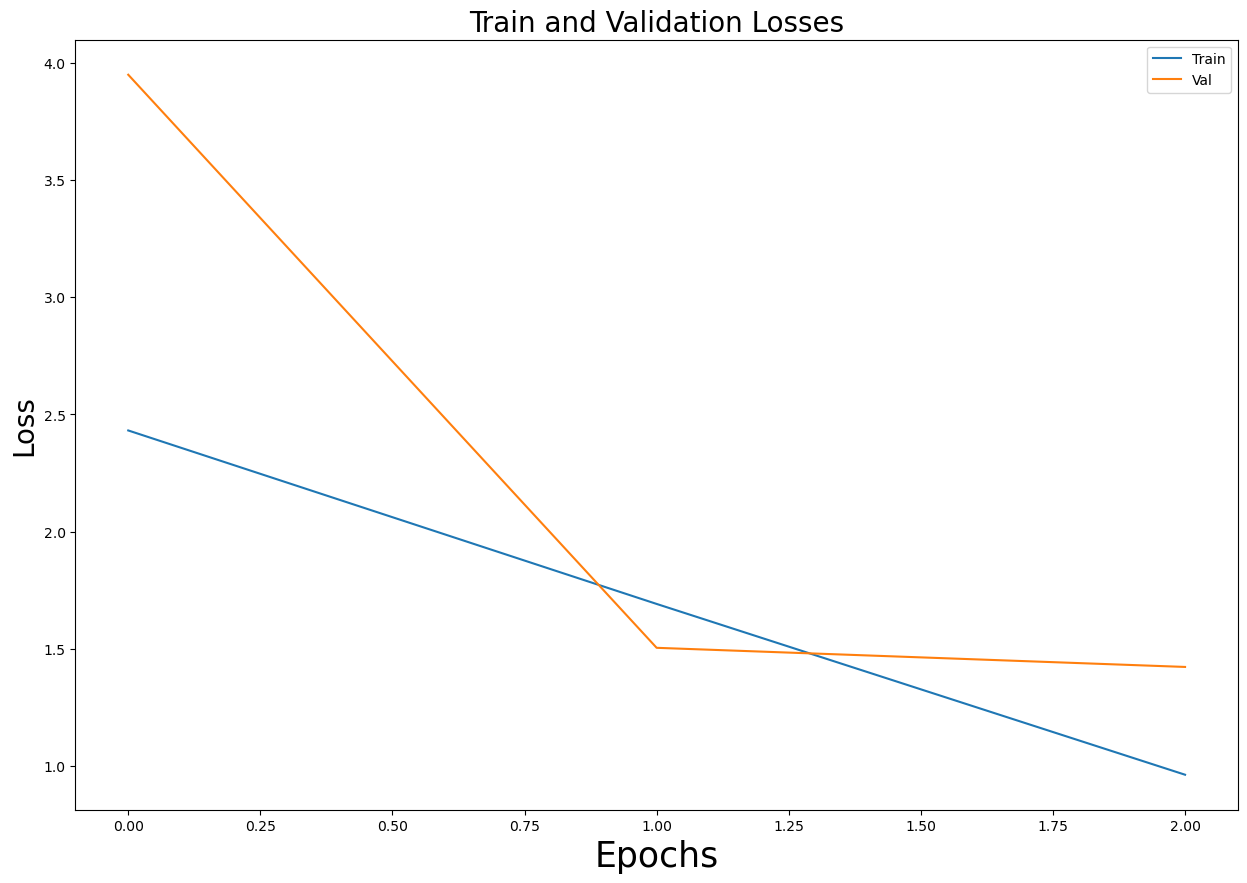

In [ ]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(1,1,figsize=(15,10))

ax.set_title("Train and Validation Losses",size=20)
ax.set_ylabel('Loss', fontsize = 20) 
ax.set_xlabel('Epochs', fontsize = 25) 
_=ax.plot(train_losses)
_=ax.plot(val_losses)
_=ax.legend(('Train','Val'),loc='upper right')

**Model Evaluation:**

1. Loss graph is plotted to see the performance on the train and validation dataset.From graph, we can say that train loss and validation loss is also decreasing.
2. Model is put against the test dataset to calculate the F1 score and exact match score.

In [ ]:
import torch
from transformers import AutoTokenizer,BertTokenizerFast

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('albert-base-v2')

#drive.mount('/content/drive')
#model = torch.load("/content/drive/My Drive/my_model_directory/my_model.pt",map_location=torch.device('cpu'))
#model.eval()

In [ ]:
from transformers import AlbertForQuestionAnswering
from transformers import AutoTokenizer,BertTokenizerFast

#loaded_dict = torch.load("/content/drive/My Drive/my_model_directory/my_model_2.pt", map_location=torch.device('cpu'))
loaded_dict = torch.load("alberta.pt", map_location=torch.device('cpu'))

model = AlbertForQuestionAnswering.from_pretrained('albert-base-v2')
model.load_state_dict(loaded_dict)
model.eval()

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForQuestionAnswering: ['predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.bias', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForQuestionAnswering were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN t

AlbertForQuestionAnswering(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias

In [ ]:
def predict(context,query):

  inputs = tokenizer.encode_plus(query, context, return_tensors='pt').to('cpu')

  outputs = model(**inputs)
  answer_start = torch.argmax(outputs[0])  
  answer_end = torch.argmax(outputs[1]) + 1 

  answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))

  return answer

def normalize_text(s):
  import string, re

  def remove_articles(text):
    regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
    return re.sub(regex, " ", text)

  def white_space_fix(text):
    return " ".join(text.split())

  def remove_punc(text):
    exclude = set(string.punctuation)
    return "".join(ch for ch in text if ch not in exclude)

  def lower(text):
    return text.lower()

  return white_space_fix(remove_articles(remove_punc(lower(s))))

def compute_exact_match(prediction, truth):
    return int(normalize_text(prediction) == normalize_text(truth))

def compute_f1(prediction, truth):
  pred_tokens = normalize_text(prediction).split()
  truth_tokens = normalize_text(truth).split()
  
  if len(pred_tokens) == 0 or len(truth_tokens) == 0:
    return int(pred_tokens == truth_tokens)
  
  common_tokens = set(pred_tokens) & set(truth_tokens)
  
  if len(common_tokens) == 0:
    return 0
  
  prec = len(common_tokens) / len(pred_tokens)
  rec = len(common_tokens) / len(truth_tokens)
  
  return 2 * (prec * rec) / (prec + rec)

In [ ]:
def give_an_answer(context,query,answer):

  prediction = predict(context,query)
  em_score = compute_exact_match(prediction, answer)
  f1_score = compute_f1(prediction, answer)

  print(f"Question: {query}")
  print(f"Prediction: {prediction}")
  print(f"True Answer: {answer}")
  print(f"EM: {em_score}")
  print(f"F1: {f1_score}")
  print("\n")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google/electra-base-discriminator")

context = """ The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing pandemic of coronavirus disease 2019 (COVID-19) 
              caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, China. 
              The World Health Organization declared the outbreak a Public Health Emergency of International Concern in January 2020 and a pandemic 
              in March 2020. As of 6 February 2021, more than 105 million cases have been confirmed, with more than 2.3 million deaths attributed to COVID-19.
              Symptoms of COVID-19 are highly variable, ranging from none to severe illness. The virus spreads mainly through the air when people are 
              near each other.[b] It leaves an infected person as they breathe, cough, sneeze, or speak and enters another person via their mouth, nose, or eyes. 
              It may also spread via contaminated surfaces. People remain infectious for up to two weeks, and can spread the virus even if they do not show symptoms.[9]"""

queries = [
           "What is COVID-19?",
           "What is caused by COVID-19?",
           "How many cases have been confirmed from COVID-19?",
           "How many deaths have been confirmed from COVID-19?",
           "How is COVID-19 spread?",
           "How long can an infected person remain infected?",
           "Can a infected person spread the virus even if they don't have symptoms?",
           "What do elephants eat?"
          ]
answers = [
           "an ongoing pandemic of coronavirus disease 2019",
           "severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)",
           "more than 105 million cases",
           "more than 2.3 million deaths",
           "mainly through the air when people are near each other. It leaves an infected person as they breathe, cough, sneeze, or speak and enters another person via their mouth, nose, or eyes. It may also spread via contaminated surfaces.",
           "up to two weeks",
           "yes",
           ""
          ]

for q,a in zip(queries,answers):
  give_an_answer(context,q,a)

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Question: What is COVID-19?
Prediction: 
True Answer: an ongoing pandemic of coronavirus disease 2019
EM: 0
F1: 0


Question: What is caused by COVID-19?
Prediction: 
True Answer: severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
EM: 0
F1: 0


Question: How many cases have been confirmed from COVID-19?
Prediction: ? [SEP] the covid - 19 pandemic, also known as the coronavirus pandemic, is an ongoing pandemic of coronavirus disease 2019 ( covid - 19 ) caused by severe acute respiratory syndrome coronavirus 2 ( sars - cov - 2 ). it was first identified in december 2019 in wuhan, china. the world health organization declared the outbreak
True Answer: more than 105 million cases
EM: 0
F1: 0


Question: How many deaths have been confirmed from COVID-19?
Prediction: ? [SEP] the
True Answer: more than 2.3 million deaths
EM: 0
F1: 0


Question: How is COVID-19 spread?
Prediction: 
True Answer: mainly through the air when people are near each other. It leaves an infected person as th

In [ ]:
context = """ Mount Olympus is the highest mountain in Greece. It is part of the Olympus massif near 
              the Gulf of Thérmai of the Aegean Sea, located in the Olympus Range on the border between 
              Thessaly and Macedonia, between the regional units of Pieria and Larissa, about 80 km (50 mi) 
              southwest from Thessaloniki. Mount Olympus has 52 peaks and deep gorges. The highest peak, 
              Mytikas, meaning "nose", rises to 2917 metres (9,570 ft). It is one of the 
              highest peaks in Europe in terms of topographic prominence. """

queries = [
           "How many metres is Olympus?",
           "Where Olympus is near?",
           "How far away is Olympus from Thessaloniki?"
          ]
answers = [
           "2917",
           "Gulf of Thérmai of the Aegean Sea",
           "80 km (50 mi)"
          ]

for q,a in zip(queries,answers):
  give_an_answer(context,q,a)

Question: How many metres is Olympus?
Prediction: 
True Answer: 2917
EM: 0
F1: 0


Question: Where Olympus is near?
Prediction: , mytikas, meaning " nose ", rises to 291
True Answer: Gulf of Thérmai of the Aegean Sea
EM: 0
F1: 0


Question: How far away is Olympus from Thessaloniki?
Prediction: ? [SEP] mount olympus is the highest mountain in greece. it is part of the olympus massif near the gulf of thermai of the aegean sea, located in the olympus range on the border between thessaly and macedonia, between the regional units of pieria and larissa, about 80 km ( 50 mi ) southwest from thessaloniki. mount olympus has 52 peaks and deep gorges. the highest peak, mytikas, meaning " nose ", rises to 291
True Answer: 80 km (50 mi)
EM: 0
F1: 0.12121212121212122




In [ ]:
context = """ Harry Potter is a series of seven fantasy novels written by British author, J. K. Rowling. The novels chronicle the lives of a young wizard, 
              Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. 
              The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard 
              governing body known as the Ministry of Magic and subjugate all wizards and Muggles (non-magical people). Since the release of the first novel, 
              Harry Potter and the Philosopher's Stone, on 26 June 1997, the books have found immense popularity, positive reviews, and commercial success worldwide. 
              They have attracted a wide adult audience as well as younger readers and are often considered cornerstones of modern young adult literature.[2] 
              As of February 2018, the books have sold more than 500 million copies worldwide, making them the best-selling book series in history, and have been translated 
              into eighty languages.[3] The last four books consecutively set records as the fastest-selling books in history, with the final installment selling roughly 
              eleven million copies in the United States within twenty-four hours of its release.  """

queries = [
           "Who wrote Harry Potter's novels?",
           "Who are Harry Potter's friends?",
           "Who is the enemy of Harry Potter?",
           "What are Muggles?",
           "Which is the name of Harry Poter's first novel?",
           "When did the first novel release?",
           "Who was attracted by Harry Potter novels?",
           "How many languages Harry Potter has been translated into? "
          ]
answers = [
           "J. K. Rowling",
           "Hermione Granger and Ron Weasley",
           "Lord Voldemort",
           "non-magical people",
           "Harry Potter and the Philosopher's Stone",
           "26 June 1997",
           "a wide adult audience as well as younger readers",
           "eighty"
          ]

for q,a in zip(queries,answers):
  give_an_answer(context,q,a)

Question: Who wrote Harry Potter's novels?
Prediction: ? [SEP] harry potter is a series of seven fantasy novels written by british author, j. k. rowling. the novels chronicle the
True Answer: J. K. Rowling
EM: 0
F1: 0.2857142857142857


Question: Who are Harry Potter's friends?
Prediction: british author, j. k. rowling. the novels chronicle the
True Answer: Hermione Granger and Ron Weasley
EM: 0
F1: 0


Question: Who is the enemy of Harry Potter?
Prediction: ? [SEP] harry potter is a series of seven fantasy novels written by british author, j. k. rowling. the novels chronicle the
True Answer: Lord Voldemort
EM: 0
F1: 0


Question: What are Muggles?
Prediction: 
True Answer: non-magical people
EM: 0
F1: 0


Question: Which is the name of Harry Poter's first novel?
Prediction: ? [SEP] harry potter is a series of seven fantasy novels written by british author, j. k. rowling. the novels chronicle the
True Answer: Harry Potter and the Philosopher's Stone
EM: 0
F1: 0.1739130434782609


Quest

**Improvements:**
1. Model could be trained on more epochs given more computational power.
2. Improved quality and quantity of the dataset could improve the performance of the model as well.

**References:**
1. https://www.kaggle.com/competitions/asap-sas/data
2. https://towardsdatascience.com/question-answering-with-pretrained-transformers-using-pytorch-c3e7a44b4012

**Credits:**
1. https://huggingface.co/docs/transformers/tasks/question_answering
2. https://github.com/alexaapo/BERT-based-pretrained-model-using-SQuAD-2.0-dataset